In [1]:
#%matplotlib inline # not today!
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact # for fancy plots
import ipywidgets as widgets

In [2]:
# let's make some data

def make_data(ndatapoints=100, noise=0, x2corr=-0.4):
    # generate our two stimulus features, x1 and x2
    x1 = np.random.randn(ndatapoints)
    
    # generate x2 that is negatively correlated with x1
    x2 = x2corr * x1 + (1 - np.abs(x2corr)) * np.random.randn(ndatapoints)
    
    # concatenate x1 and x2 into a matrix!
    x = np.vstack([x1, x2]).T
    
    # select some weights!
    b_true = np.array([3.7, -6.8])
    
    # make response
    y = np.dot(x, b_true) + np.random.randn(ndatapoints) * noise
    
    return x, y

In [3]:
x, y = make_data(ndatapoints=10, noise=0.5, x2corr=-0.4)
print(x)
print(y)

[[ 0.70536671  0.30231798]
 [-0.876275    0.36279457]
 [-0.59704709 -0.50115683]
 [-1.05013688  0.15867531]
 [ 0.2153059   0.13702851]
 [-0.57728856 -0.15088802]
 [ 0.00920284  0.0461607 ]
 [-0.37116808 -0.05628556]
 [-0.42913567 -0.12973535]
 [ 0.34382872  0.55567232]]
[ 0.75370261 -5.87971508  1.51414931 -4.44919801 -0.12764864 -1.94536218
 -1.00216448 -0.65713741 -1.05440797 -2.46902756]


<IPython.core.display.Javascript object>


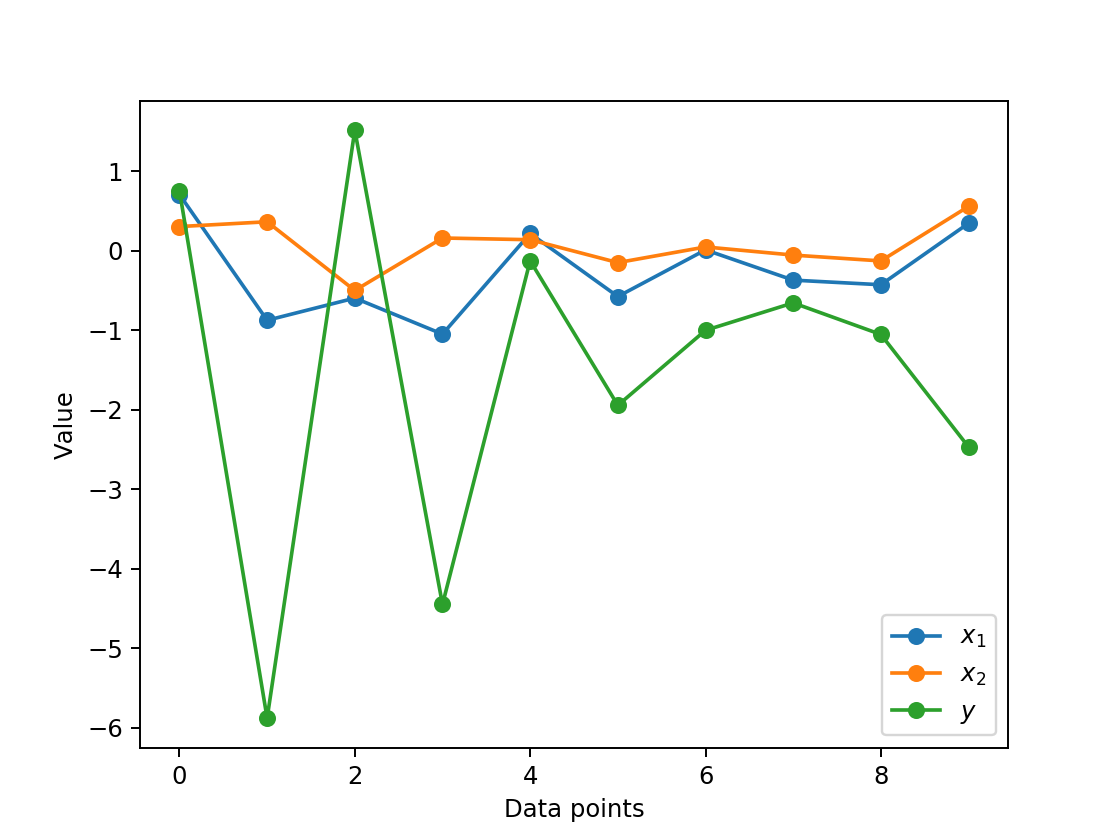

In [4]:
plt.plot(x[:,0], 'o-', label='$x_1$')
plt.plot(x[:,1], 'o-', label='$x_2$')
plt.plot(y, 'o-', label='$y$')
plt.xlabel("Data points")
plt.ylabel("Value")
plt.legend();

In [8]:
y.shape

(10,)

In [11]:
b1, b2 = np.meshgrid(np.linspace(-2, 7, 50), np.linspace(-9, 1, 50))

bs = np.vstack([b1.ravel(), b2.ravel()])
print(bs.shape)

# get predicted response for each weight of weights
y_pred = np.dot(x, bs)

# calculate the error for each set of weights
err = ((y[:,np.newaxis] - y_pred) ** 2).sum(axis=0)
print(err.shape)

err_reshape = err.reshape(b1.shape)

(2, 2500)
(2500,)


<IPython.core.display.Javascript object>


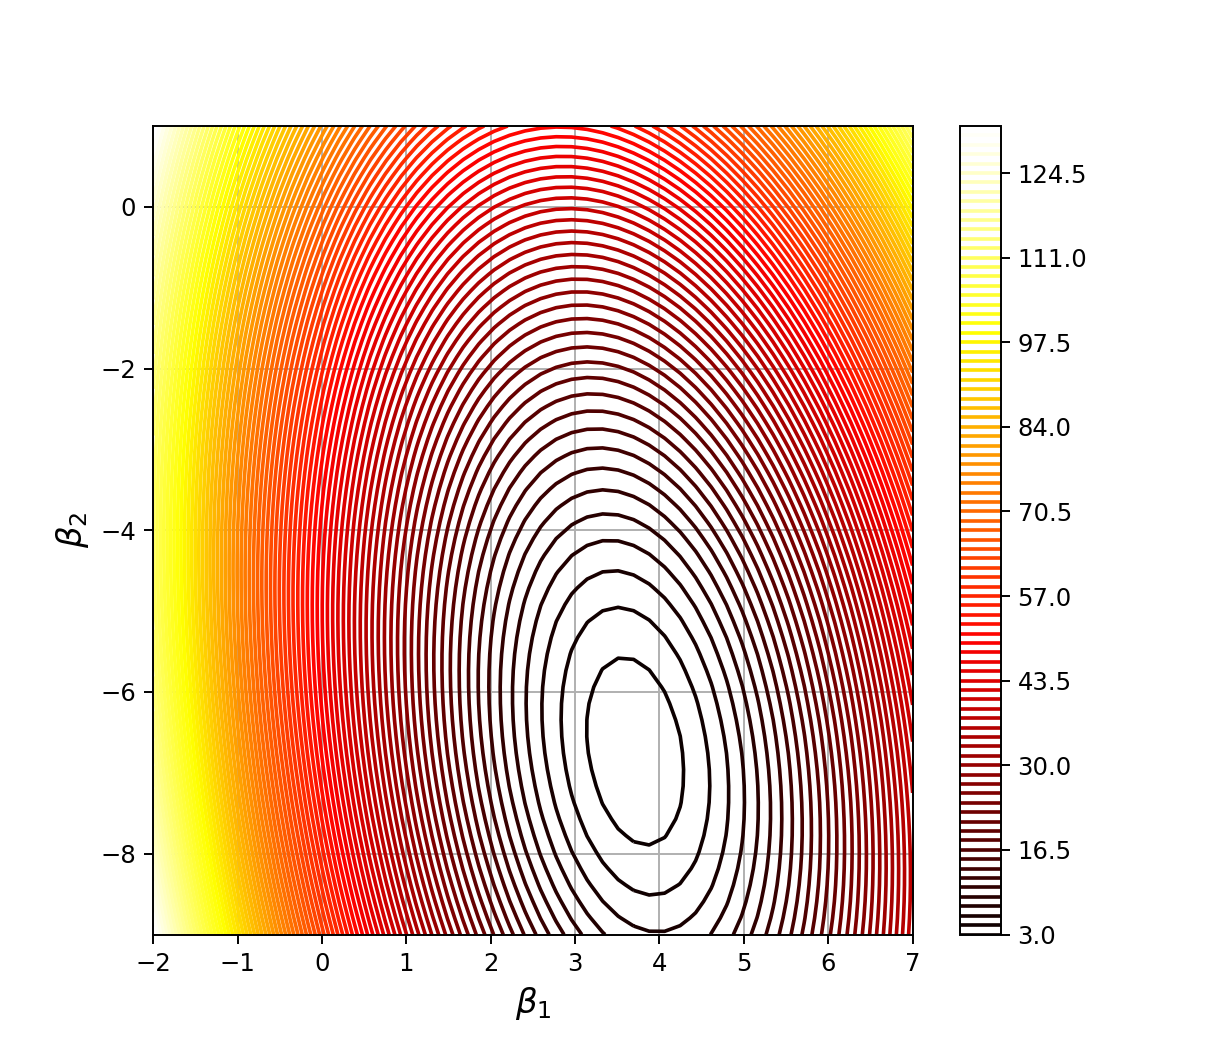

In [12]:
# plot the error for each combination of weights!
plt.figure(figsize=(7,6))
plt.contour(b1, b2, err_reshape, 100, cmap='hot')
plt.colorbar()
plt.xlabel(r"$\beta_1$", fontsize=14)
plt.ylabel(r"$\beta_2$", fontsize=14)
plt.grid();

In [13]:
steps = 500 # number of steps
step_size = 0.01 # how long is each step

b_est = np.array([0.0, 0.0])
b_est_history = np.zeros((steps+1, 2))
b_est_history[0] = b_est

for ii in range(steps):
    err = y - x.dot(b_est)
    step = x.T.dot(err)
    b_est += step_size * step
    b_est_history[ii+1] = b_est


<IPython.core.display.Javascript object>


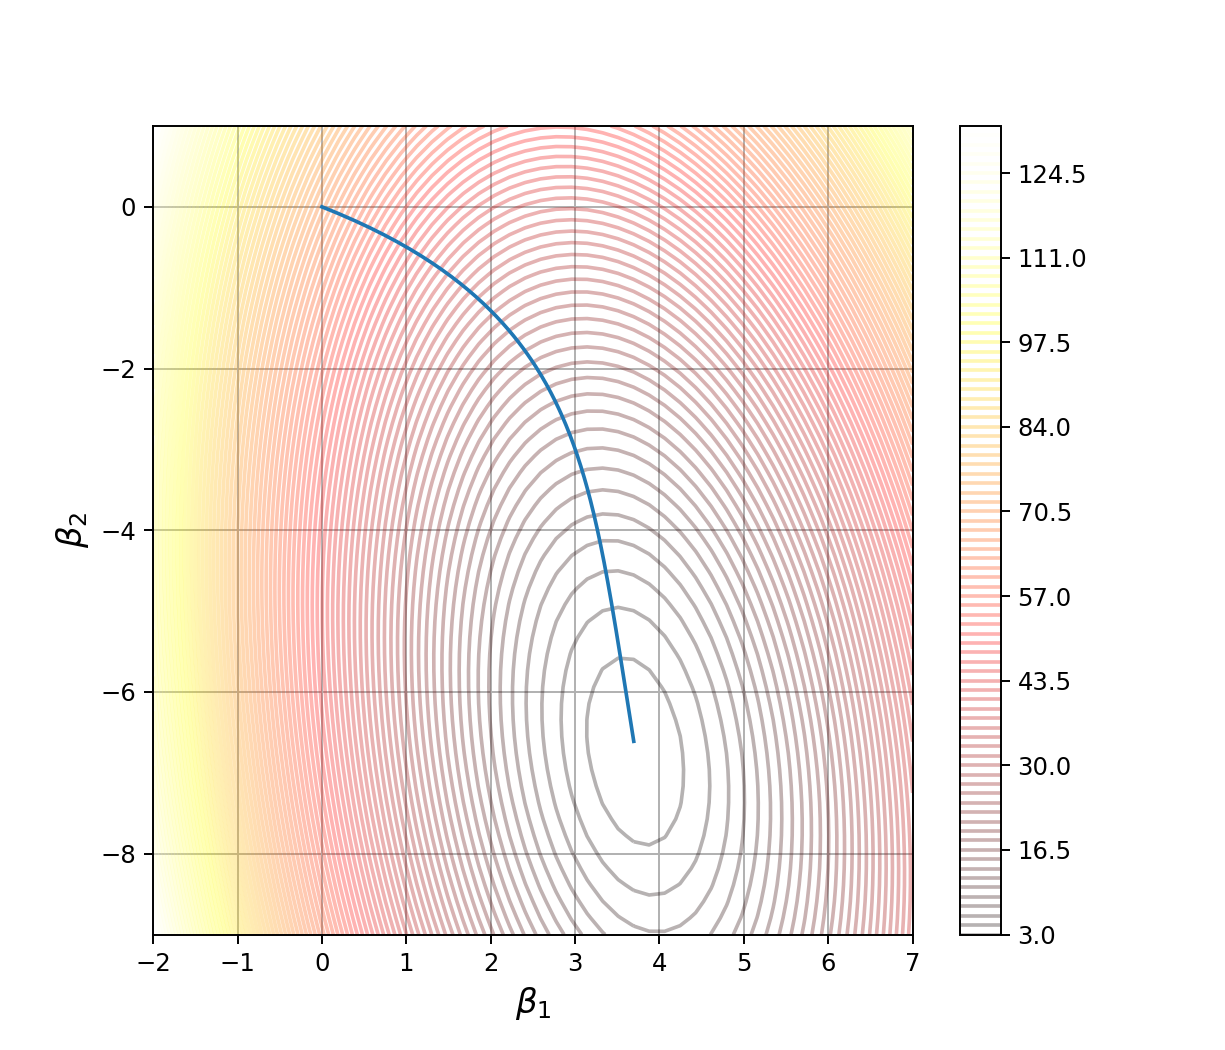

interactive(children=(IntSlider(value=1, description='view_steps', max=500, min=1), Output()), _dom_classes=('…

In [15]:
# plot the error for each combination of weights!
plt.figure(figsize=(7,6))
plt.contour(b1, b2, err_reshape, 100, cmap='hot', alpha=0.3)
plt.colorbar()
plt.xlabel(r"$\beta_1$", fontsize=14)
plt.ylabel(r"$\beta_2$", fontsize=14)
plt.grid();

grad_line = plt.plot(b_est_history[:steps,0], b_est_history[:steps,1])[0]

def update(view_steps):
    grad_line.set_data(b_est_history[:view_steps,0], b_est_history[:view_steps,1])

t_slider = widgets.IntSlider(value=1, min=1, max=steps, step=1)
interact(update, view_steps=t_slider);